## import lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn import svm
%matplotlib inline

## data loading

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
data_directory = '/content/gdrive/MyDrive/aiml_lab/'

In [ ]:
data= pd.read_csv(data_directory+"bank-full.csv",sep=';') 

## data summary

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print(data,5)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
print("missing   \n",data.isnull().sum())

missing   
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
print ("\nall the features/columns : \n" ,data.columns.tolist())
print ("\total nunique values :  \n",data.nunique())
print(data.info())


features/columns : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan 

In [ ]:
data_copy=data.copy()

## Data encoding

In [ ]:

data_copy['marital'] = data_copy['marital'].map({'married':1,'single':2,'divorced':3})
data_copy['education'] = data_copy['education'].map({'tertiary':1,'secondary':2,'primary':3,'unknown':4})
data_copy['default'] = data_copy['default'].map({'yes':1,'no':2})
data_copy['housing'] = data_copy['housing'].map({'yes':1,'no':2})
data_copy['loan'] = data_copy['loan'].map({'yes':1,'no':2})
data_copy['contact'] = data_copy['contact'].map({'telephone':1,'cellular':2,'unknown':3})
data_copy['poutcome'] = data_copy['poutcome'].map({'success':1,'other':2,'unknown':3,'failure':4})
data_copy['job'] = data_copy['job'] .map({'management':1,'entrepreneur':2,'technician':3,'blue-collar':4,'unknown':5,'retired':6,'admin.':7,'services':8
                                      ,'self-employed':9,'unemployed':10,'housemaid':11,'student':12})
data_copy['month']=data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
data_copy['y'] = data_copy['y'].map({'yes':1,'no':2})


In [ ]:
scaler = preprocessing.StandardScaler() 
fields = data_copy.columns.values[:-1]
data_x = pd.DataFrame(scaler.fit_transform(data_copy[fields]), columns = fields)

## correlation heatmap

<AxesSubplot:>

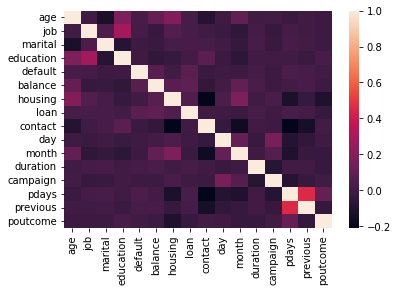

In [ ]:
sns.heatmap(data_x.corr())

## data split 70 30

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x,data_copy['y'], test_size = 0.30, random_state = 43)


## svc with rbf gaussian

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf_rbf = svm.SVC(kernel ='rbf', random_state = 43)

In [ ]:
clf_rbf.fit(X_train,y_train)

SVC(random_state=43)

In [ ]:
y_pred_rbf=clf_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test,y_pred_rbf)*100
confusion_mat = confusion_matrix(y_test,y_pred_rbf)


print("Our Accuracy for SVM with the help of rbf kernel is:",accuracy)
print("Our Confusion Matrix is")
print(confusion_mat)

Accuracy for SVM with rbf kernel is: 89.87761722205839
Confusion Matrix
[[  451  1138]
 [  235 11740]]


## svc with sigmoid

In [ ]:
clf_sig = SVC(kernel ='sigmoid', random_state = 43)
clf_sig.fit(X_train,y_train)

SVC(kernel='sigmoid', random_state=43)

In [ ]:
y_pred_sig=clf_sig.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test,y_pred_sig)*100
confusion_mat = confusion_matrix(y_test,y_pred_sig)

print("Our Accuracy for SVM with the help of sigmoid kernel is:",accuracy)
print("Our Confusion Matrix is")
print(confusion_mat)

Accuracy for SVM with sigmoid kernel is: 83.23503391329992
Confusion Matrix
[[  429  1160]
 [ 1114 10861]]
